In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from Scikit learn
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [3]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [8]:
df['stab'].value_counts()

0.055347    1
0.007779    1
0.053271    1
0.060622    1
0.034466    1
           ..
0.001950    1
0.019006    1
0.041277    1
0.003277    1
0.045263    1
Name: stab, Length: 10000, dtype: int64

In [9]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

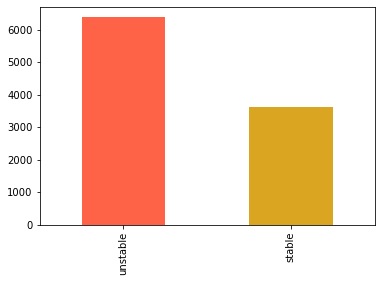

In [10]:
df['stabf'].value_counts().plot(kind='bar', color=['tomato', 'goldenrod']);

In [11]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [12]:
df = df.drop(columns=['stab'])

In [13]:
x = df.drop(columns='stabf')
y = df['stabf']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2 , random_state= 1 )
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [15]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=['tau4']))
normalised_train_df = pd.DataFrame(normalised_train_df,
columns=x_train_balanced.drop(columns=['tau4']).columns)
normalised_train_df['tau4'] = x_train_balanced['tau4'] 

In [17]:
x_test = x_test.reset_index(drop= True )
normalised_test_df = scaler.transform(x_test.drop(columns=[ 'tau4' ]))
normalised_test_df = pd.DataFrame(normalised_test_df,
columns=x_test.drop(columns=[ 'tau4' ]).columns)
normalised_test_df[ 'tau4' ] = x_test[ 'tau4' ] 

In [18]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, y_balanced)

LogisticRegression()

In [19]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_balanced, cv=5, scoring='f1_macro')
scores

array([0.80166334, 0.81786784, 0.80215928, 0.83405207, 0.80373201])

In [20]:
#Confusion Matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
new_predictions = log_reg.predict(normalised_test_df)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=['stable', 'unstable'])
cnf_mat 

array([[ 552,  160],
       [ 270, 1018]], dtype=int64)

In [21]:
#accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 78


In [22]:
#precision
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')
print('Precision: {}'.format(round(precision*100), 2))

Precision: 86


In [23]:
#f1 score
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label='unstable')
print('F1: {}'.format(round(f1*100), 2))

F1: 83


In [24]:
#Kfold
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.split(normalised_train_df) 
f1_scores = []
#run for every split
for train_index, test_index in kf.split(normalised_train_df):
    x_train, x_test = normalised_train_df.iloc[train_index], normalised_train_df.iloc[test_index]
    y_train, y_test = y_balanced[train_index], y_balanced[test_index]
    model = LogisticRegression().fit(x_train, y_train)
  #save result to list
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), 
                   pos_label='unstable')*100)

In [25]:
#StratifiedKFold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
f1_scores = []
#run for every split
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
    x_train, x_test = np.array(normalised_train_df)[train_index], np.array(normalised_train_df)[test_index]
    y_train, y_test  = y_balanced[train_index], y_balanced[test_index]
    model = LogisticRegression().fit(x_train, y_train)
  #save result to list
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='unstable'))

In [26]:
from scipy.sparse.linalg.eigen import test
np.random.seed(42)

In [27]:
x_train

array([[0.60589517, 0.21489752, 0.68682574, ..., 0.66936   , 0.64223413,
        9.47651817],
       [0.48109731, 0.52530525, 0.79747025, ..., 0.91282399, 0.08340342,
        0.7610747 ],
       [0.07572417, 0.87424452, 0.35515473, ..., 0.1988299 , 0.64230625,
        8.43394853],
       ...,
       [0.05206475, 0.23558991, 0.83620536, ..., 0.31842122, 0.17277575,
        8.3231025 ],
       [0.47596048, 0.09753221, 0.03534141, ..., 0.52714543, 0.06613792,
        3.51875217],
       [0.40032206, 0.07518624, 0.12678963, ..., 0.14125395, 0.83137297,
        9.19827365]])

In [28]:
y_train

0        unstable
1        unstable
2        unstable
3        unstable
6        unstable
           ...   
10178      stable
10179      stable
10180      stable
10181      stable
10182      stable
Name: stabf, Length: 8148, dtype: object

In [32]:
# putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),}
        

# setting up a function to fit and score model
def fit_and_score(models, x_train, x_test, y_train, y_test):
  
    """
    fits and evaluates given machine learning models
    models: a dictionary of different scikit learn machine learning models
    X_train: Training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    #setting up a random seed
    np.random.seed(42)

    #making a dictionary to keep model scores
    model_scores = {}

    #looping through models
    for name , model in models.items():
        #fitting the modelto the data
        model.fit(x_train, y_train)
        #evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores  

In [33]:
model_scores = fit_and_score(models=models,
                              x_train=x_train,
                              x_test=x_test,
                              y_train=y_train,
                              y_test=y_test)
model_scores

{'Logistic Regression': 0.8099214145383105,
 'KNN': 0.8698428290766208,
 'Random Forest': 0.9361493123772102}

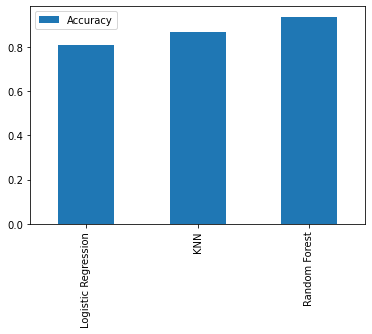

In [37]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar(); #T means transpose , so as to improve the plot

In [34]:
corr_mat = df.corr()
corr_mat

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909


In [35]:
import seaborn as sns

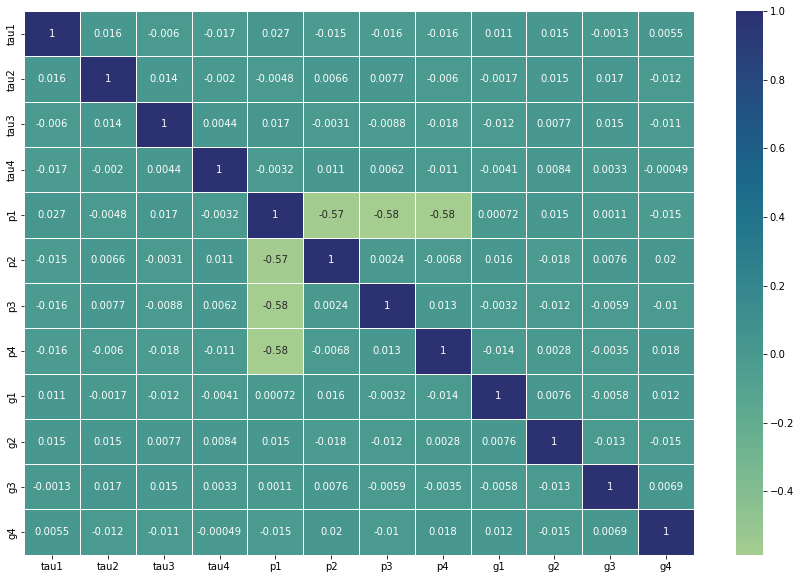

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat,
                 linewidths=0.5,
                 annot=True,
                 cmap='crest');

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# creating a hyperparameter grid for logistic regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver':['liblinear']}
# creating a hyperparameter grid for randomforestclassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_smaples_split':np.arange(2, 20, 2),
           'min_samples_leaf':np.arange(1, 20, 2)}

In [40]:
# Tuning logisticsregression

np.random.seed(42)
# setup random hyperparameter search for Logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fitting random hyperparameter search model for logisticRegression


In [41]:
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [43]:
rs_log_reg.score(x_test, y_test)

0.8109037328094303

In [ ]:
# Tuning Randonmforestclassifier

np.random.seed(42)
# set up random hyperparameter search for Randomdorestclassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=30,
                                verbose=True)

# fitting random hyperparameter search model for RandomforestClassiifer
rs_rf.fit(x_train, y_train)

In [44]:
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}
np.random.seed(42)

# setup Grid hyperparameter search for Logisticregression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# fitting Grid hyperparameter search model for logisticRegression
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(x_test, y_test)

0.81237721021611

In [ ]:
#Evaluating the Tuned machine Learning classifier, beyond accuracy

In [47]:
y_preds = gs_log_reg.predict(x_test)

In [48]:
y_preds

array(['unstable', 'unstable', 'stable', ..., 'stable', 'stable',
       'stable'], dtype=object)

In [49]:
y_test

4        unstable
5          stable
13         stable
57       unstable
73         stable
           ...   
10168      stable
10173      stable
10176      stable
10177      stable
10183      stable
Name: stabf, Length: 2036, dtype: object

In [50]:
print(confusion_matrix(y_test, y_preds))

[[815 203]
 [179 839]]


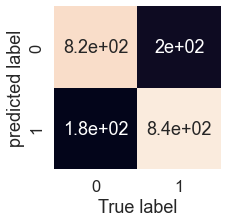

In [51]:
from IPython.core.pylabtools import figsize
# plotting the confusion matrix to make it more visual
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
  """
  plots a good looking confusion matrix using seaborn's heatmap()
  """
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
  plt.xlabel('True label')
  plt.ylabel('predicted label')
plot_conf_mat(y_test, y_preds)

In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

      stable       0.82      0.80      0.81      1018
    unstable       0.81      0.82      0.81      1018

    accuracy                           0.81      2036
   macro avg       0.81      0.81      0.81      2036
weighted avg       0.81      0.81      0.81      2036



In [53]:
# checking the best paramters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [55]:
# creating new classifier with best parameters
clf = LogisticRegression(C=0.1082636733874054,
                         solver='liblinear')

In [56]:
#Cross _validated accuracy
cv_acc = cross_val_score(clf, x, y, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8100999999999999

In [57]:
#Cross_validated precision
cv_precision = cross_val_score(clf, x, y, scoring='precision')
cv_acc = np.mean(cv_precision)
cv_precision

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "C:\Users\HP\anaconda3\lib\site-packages\sk

array([nan, nan, nan, nan, nan])

In [58]:
#cross_validated recall
cv_recall = cross_val_score(clf, x, y, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklea

nan